In [243]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
import datetime
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar



In [49]:
# import the datasets

day = pd.read_csv(r"C:\Users\anupd\OneDrive\Desktop\capital-bike-share\2011 -12 Exploratory Analysis\Dataset\day.csv")
hour = pd.read_csv(r"C:\Users\anupd\OneDrive\Desktop\capital-bike-share\2011 -12 Exploratory Analysis\Dataset\hour.csv")

In [50]:
# check for null data
hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [51]:
day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [52]:
# BOTH DF ARE FREE OF MISSING VALUES

In [53]:
# Let's now have a look at the DFs
hour.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [54]:
day.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [55]:
hour.shape

(17379, 17)

In [56]:
day.shape

(731, 16)

In [57]:
# rename columns for more consistency

day.rename(columns={"dteday": "date", "yr": "year", "mnth":"month","weathersit":"weather_conditions", "atemp":"felt_temp", "hum":"humidity", "casual":"bike_casual_users", "registered":"bike_registered_users", "cnt":"tot_bike_users"}, inplace=True)
hour.rename(columns={"dteday": "date", "yr": "year", "mnth":"month","hr":"hour","weathersit":"weather_conditions", "atemp":"felt_temp", "hum":"humidity", "casual":"casual_users", "registered":"registered_users", "cnt":"tot_users"}, inplace=True)

In [58]:
# replace values for more consistency

hour["season"]=hour["season"].replace([1,2,3,4], ["Winter","Spring", "Summer", "Fall"])
hour["year"]=hour["year"].replace([0,1], ["2011","2012"])
hour["weekday"]=hour["weekday"].replace([1,2,3,4,5,6,0], ["Monday","Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"])
hour["workingday"]=hour["workingday"].replace([0,1], ["no","yes"])
hour["holiday"]=hour["holiday"].replace([0,1], ["no","yes"])
hour["weather_conditions"]=hour["weather_conditions"].replace([1,2,3,4], ["Sunny","Cloudy", "Rainy", "Stormy"])
hour["month"]=hour["month"].replace([1,2,3,4,5,6,7,8,9,10,11,12], ["January","February", "March", "April","May","June", "July", "August","September","October", "November", "December"])

In [59]:
day["season"]=day["season"].replace([1,2,3,4], ["Winter","Spring", "Summer", "Fall"])
day["year"]=day["year"].replace([0,1], ["2011","2012"])
day["weekday"]=day["weekday"].replace([1,2,3,4,5,6,0], ["Monday","Tuesday", "Wednesday", "Thursday", "Friday", "Sathurday","Sunday"])
day["workingday"]=day["workingday"].replace([0,1], ["no","yes"])
day["holiday"]=day["holiday"].replace([0,1], ["no","yes"])
day["weather_conditions"]=day["weather_conditions"].replace([1,2,3,4], ["Sunny","Cloudy", "Rainy", "Stormy"])
day["month"]=day["month"].replace([1,2,3,4,5,6,7,8,9,10,11,12], ["January","February", "March", "April","May","June", "July", "August","September","October", "November", "December"])

In [60]:
# It would be interesting to have a look at the different data types I have available and think about possible conversions or replacing the current data with new labels

# eg. hour.dteday should be converted to a timestamp (datetime)
# eg. values in hour.season should be replaced with season names then the data should be converted to category

In [61]:
hour.dtypes

instant                 int64
date                   object
season                 object
year                   object
month                  object
hour                    int64
holiday                object
weekday                object
workingday             object
weather_conditions     object
temp                  float64
felt_temp             float64
humidity              float64
windspeed             float64
casual_users            int64
registered_users        int64
tot_users               int64
dtype: object

In [62]:
day.dtypes

instant                    int64
date                      object
season                    object
year                      object
month                     object
holiday                   object
weekday                   object
workingday                object
weather_conditions        object
temp                     float64
felt_temp                float64
humidity                 float64
windspeed                float64
bike_casual_users          int64
bike_registered_users      int64
tot_bike_users             int64
dtype: object

In [63]:
hour.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather_conditions,temp,felt_temp,humidity,windspeed,casual_users,registered_users,tot_users
0,1,2011-01-01,Winter,2011,January,0,no,Saturday,no,Sunny,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,2011,January,1,no,Saturday,no,Sunny,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,2011,January,2,no,Saturday,no,Sunny,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,2011,January,3,no,Saturday,no,Sunny,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,2011,January,4,no,Saturday,no,Sunny,0.24,0.2879,0.75,0.0,0,1,1


In [64]:
# data type conversion

hour["date"] = pd.to_datetime(hour["date"])
hour["season"] = hour["season"].astype('category')
hour["year"] = hour["year"].astype('category')
hour["month"] = hour["month"].astype('category')
hour["hour"] = hour["hour"].astype('category')
hour["holiday"] = hour["holiday"].astype('category')
hour["workingday"] = hour["workingday"].astype('category')
hour["weather_conditions"] = hour["weather_conditions"].astype('category')
hour["weekday"] = hour["weekday"].astype('category')

In [65]:
day["date"] =  pd.to_datetime(day["date"])
day["season"] = day["season"].astype('category')
day["year"] = day["year"].astype('category')
day["month"] = day["month"].astype('category')
day["holiday"] = day["holiday"].astype('category')
day["workingday"] = day["workingday"].astype('category')
day["weather_conditions"] = day["weather_conditions"].astype('category')
day["weekday"] = day["weekday"].astype('category')

In [66]:
# denormalizing temp, first prepare formula then check with range if formula is actually working correctly

# x = 47*y - 8
x = list(hour["temp"].values*47-8)
min_val = min(x)
max_val = max(x)
range_data = (min_val, max_val)
print(range_data)

(-7.06, 39.0)


In [67]:
# replacing values in corresponding columns 
hour["temp"].replace(hour["temp"].values, list(hour["temp"].values*47-8),inplace=True)
day["temp"].replace(day["temp"].values, list(day["temp"].values*47-8),inplace=True)

In [68]:
# applying the same method to other columns

day["felt_temp"].replace(day["felt_temp"].values, list(day["felt_temp"].values*66-16),inplace=True)
hour["felt_temp"].replace(hour["felt_temp"].values, list(hour["felt_temp"].values*66-16),inplace=True)
hour["windspeed"].replace(hour["windspeed"].values, list(hour["windspeed"].values*67),inplace=True)
day["windspeed"].replace(day["windspeed"].values, list(day["windspeed"].values*67),inplace=True)
hour["humidity"].replace(hour["humidity"].values, list(hour["humidity"].values*100),inplace=True)
day["humidity"].replace(day["humidity"].values, list(day["humidity"].values*100),inplace=True)

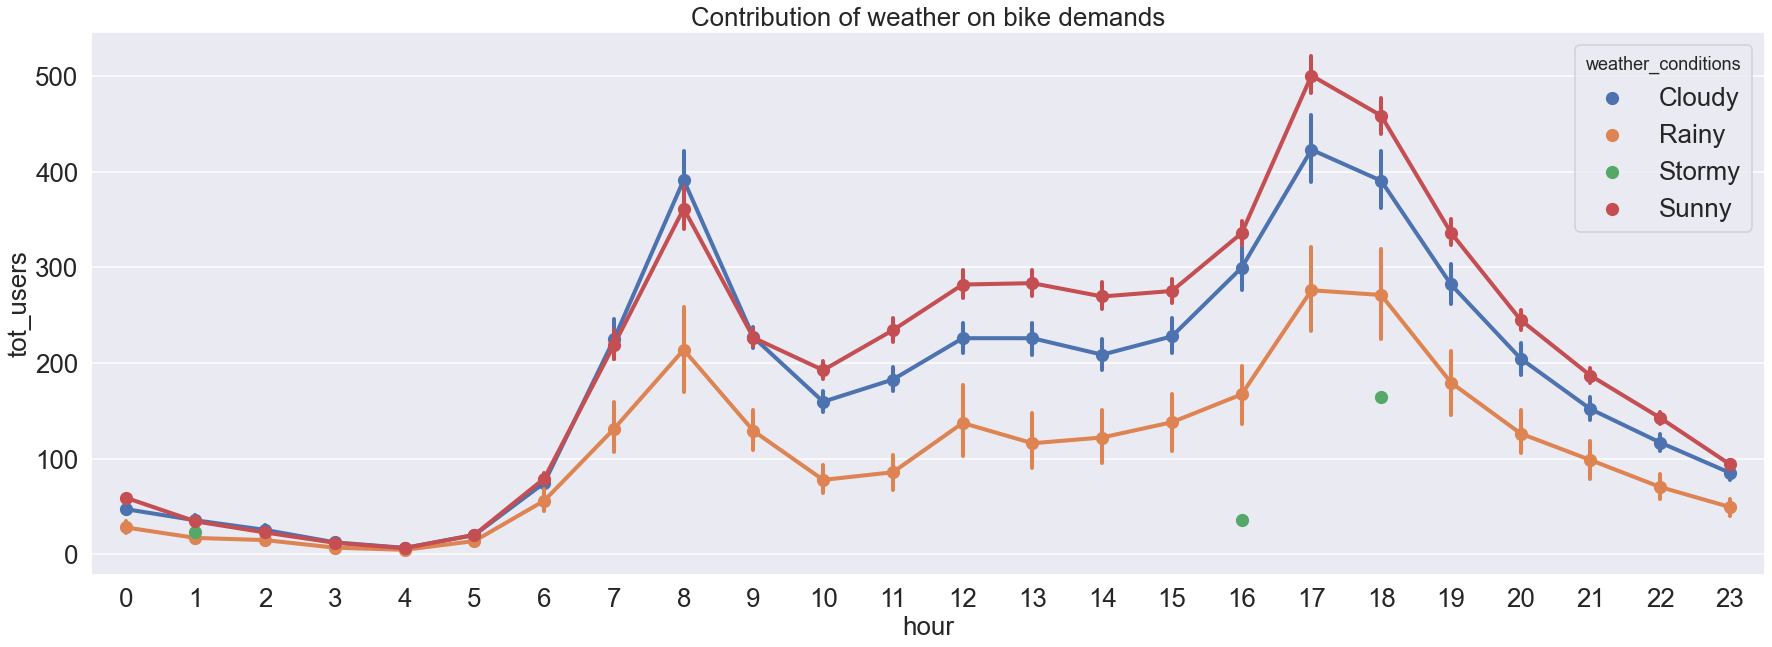

In [69]:
# 1st visualization - Contribution of weather on hourly bike demand

sns.set_style('darkgrid')
sns.set_context('talk')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)
fig,ax = plt.subplots()
sns.pointplot(data=hour[['hour',
                           'tot_users',
                           'weather_conditions']],
              x='hour',
              y='tot_users',
              hue='weather_conditions',
              ax=ax)
ax.set(title="Contribution of weather on bike demands");

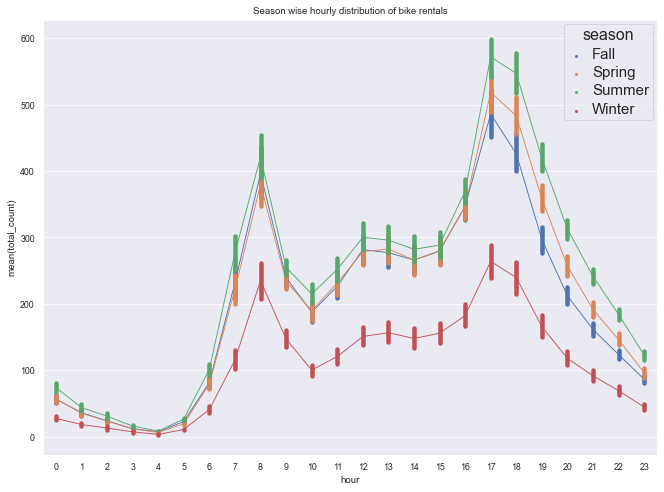

In [70]:
# 2nd visualization - 'Season wise hourly distribution of bike rentals'

sns.set(rc={'figure.figsize':(11,8)})

sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 2.5})
#sns.set(style="ticks", context="talk")
#plt.style.use("dark_background")
sns.set_style("darkgrid")

#fig, ax = plt.subplots()
ax = sns.pointplot(data = hour[['hour','tot_users','season']], x = 'hour', y = 'tot_users', scale = 0.2, hue = 'season');

plt.setp(ax.get_legend().get_texts(), fontsize='15')
plt.setp(ax.get_legend().get_title(), fontsize='16')

ax.set(title = 'Season wise hourly distribution of bike rentals',ylabel= 'mean(total_count)');

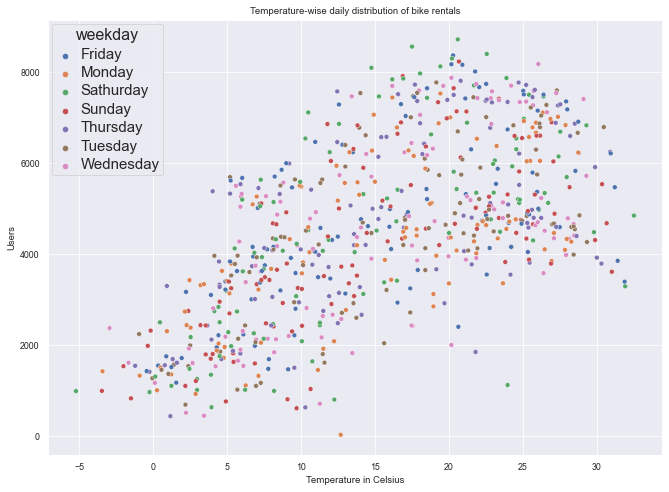

In [71]:
sns.set(rc={'figure.figsize':(11,8)})

sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 2.5})
#sns.set(style="ticks", context="talk")
#plt.style.use("dark_background")
sns.set_style("darkgrid")

#fig, ax = plt.subplots()
ax = sns.scatterplot(data = day[['temp','tot_bike_users','weekday']], x = 'temp', y = 'tot_bike_users',
               hue = 'weekday');

plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16') # for legend title

ax.set(title = 'Temperature-wise daily distribution of bike rentals',ylabel= 'Users', xlabel='Temperature in Celsius');

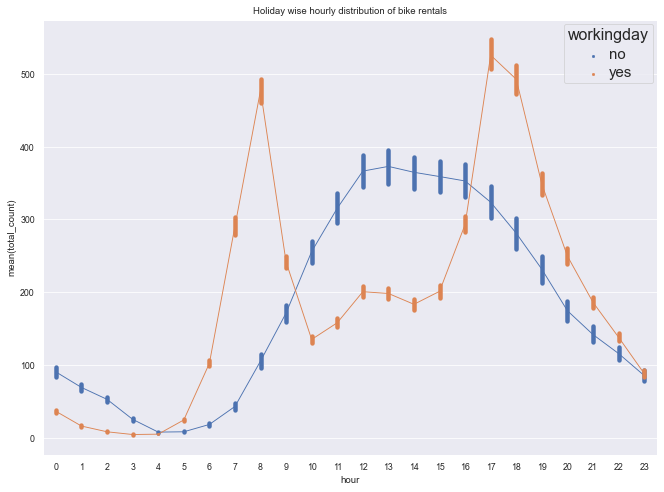

In [72]:

sns.set(rc={'figure.figsize':(11,8)})

sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 2.5})
#sns.set(style="ticks", context="talk")
#plt.style.use("dark_background")
sns.set_style("darkgrid")

#fig, ax = plt.subplots()
ax = sns.pointplot(data = hour[['hour','tot_users','workingday']], x = 'hour', y = 'tot_users',
              scale = 0.2, hue = 'workingday');

plt.setp(ax.get_legend().get_texts(), fontsize='15')
plt.setp(ax.get_legend().get_title(), fontsize='16')

ax.set(title = 'Holiday wise hourly distribution of bike rentals',ylabel= 'mean(total_count)', xlabel='hour');

In [73]:
list(hour.month.unique())

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

[Text(0.5, 1.0, 'Monthly distribution of bike rentals'),
 Text(0, 0.5, 'Mean(total_users)'),
 Text(0.5, 0, 'Month')]

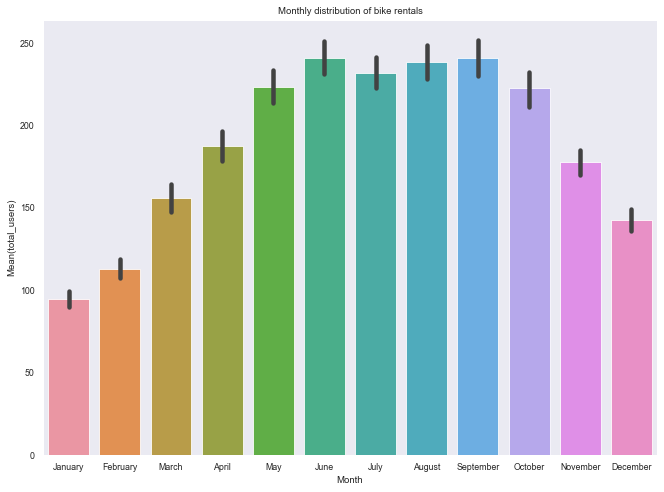

In [74]:
# MONTHLY DISTRIBUTION OF BIKE RENTALS

sns.set(rc={'figure.figsize':(11,8)})

sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 2.5})
#sns.set(style="ticks", context="talk")
#plt.style.use("dark_background")
sns.set_style("dark")

#fig, ax = plt.subplots()

ax = sns.barplot(data = hour[['tot_users','month']], x = 'month', y = 'tot_users', order=list(hour.month.unique()));
ax.set(title = 'Monthly distribution of bike rentals',ylabel= 'Mean(total_users)', xlabel='Month')

In [104]:
trip_12_1 = pd.read_csv(r'C:\Users\anupd\OneDrive\Desktop\capital-bike-share\2011 -12 Exploratory Analysis\Dataset\2012Q1-capitalbikeshare-tripdata.csv')
trip_12_2 = pd.read_csv(r'C:\Users\anupd\OneDrive\Desktop\capital-bike-share\2011 -12 Exploratory Analysis\Dataset\2012Q2-capitalbikeshare-tripdata.csv')
trip_12_3 = pd.read_csv(r'C:\Users\anupd\OneDrive\Desktop\capital-bike-share\2011 -12 Exploratory Analysis\Dataset\2012Q3-capitalbikeshare-tripdata.csv')
trip_12_4 = pd.read_csv(r'C:\Users\anupd\OneDrive\Desktop\capital-bike-share\2011 -12 Exploratory Analysis\Dataset\2012Q4-capitalbikeshare-tripdata.csv')
trip_11 = pd.read_csv(r'C:\Users\anupd\OneDrive\Desktop\capital-bike-share\2011 -12 Exploratory Analysis\Dataset\2011-capitalbikeshare-tripdata.csv')

In [105]:
# Merge 2011 and 2012 datasets-
trip = pd.concat([trip_11,trip_12_1,trip_12_2,trip_12_3,trip_12_4], axis=0)

In [106]:
trip

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,3548,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,5th & F St NW,31620,5th & F St NW,W00247,Member
1,346,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,14th & Harvard St NW,31101,14th & V St NW,W00675,Casual
2,562,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,Georgia & New Hampshire Ave NW,31104,Adams Mill & Columbia Rd NW,W00357,Member
3,434,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,10th & U St NW,31503,Florida Ave & R St NW,W00970,Member
4,233,2011-01-01 00:28:26,2011-01-01 00:32:19,31104,Adams Mill & Columbia Rd NW,31106,Calvert & Biltmore St NW,W00346,Casual
...,...,...,...,...,...,...,...,...,...
470840,8630,2012-12-31 23:51:38,2013-01-01 02:15:29,31619,Lincoln Park / 13th & East Capitol St NE,31619,Lincoln Park / 13th & East Capitol St NE,W00704,Casual
470841,418,2012-12-31 23:56:19,2013-01-01 00:03:17,31101,14th & V St NW,31200,Massachusetts Ave & Dupont Circle NW,W00098,Member
470842,384,2012-12-31 23:56:35,2013-01-01 00:03:00,31101,14th & V St NW,31200,Massachusetts Ave & Dupont Circle NW,W01398,Member
470843,448,2012-12-31 23:58:20,2013-01-01 00:05:49,31613,Eastern Market Metro / Pennsylvania Ave & 7th ...,31607,14th & D St SE,W01301,Member


In [107]:
trip['Start date'] = pd.to_datetime(trip['Start date'])
trip['End date'] = pd.to_datetime(trip['End date'])

In [108]:
trip

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,3548,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,5th & F St NW,31620,5th & F St NW,W00247,Member
1,346,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,14th & Harvard St NW,31101,14th & V St NW,W00675,Casual
2,562,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,Georgia & New Hampshire Ave NW,31104,Adams Mill & Columbia Rd NW,W00357,Member
3,434,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,10th & U St NW,31503,Florida Ave & R St NW,W00970,Member
4,233,2011-01-01 00:28:26,2011-01-01 00:32:19,31104,Adams Mill & Columbia Rd NW,31106,Calvert & Biltmore St NW,W00346,Casual
...,...,...,...,...,...,...,...,...,...
470840,8630,2012-12-31 23:51:38,2013-01-01 02:15:29,31619,Lincoln Park / 13th & East Capitol St NE,31619,Lincoln Park / 13th & East Capitol St NE,W00704,Casual
470841,418,2012-12-31 23:56:19,2013-01-01 00:03:17,31101,14th & V St NW,31200,Massachusetts Ave & Dupont Circle NW,W00098,Member
470842,384,2012-12-31 23:56:35,2013-01-01 00:03:00,31101,14th & V St NW,31200,Massachusetts Ave & Dupont Circle NW,W01398,Member
470843,448,2012-12-31 23:58:20,2013-01-01 00:05:49,31613,Eastern Market Metro / Pennsylvania Ave & 7th ...,31607,14th & D St SE,W01301,Member


In [109]:
trip.reset_index(drop=True, inplace=True)
trip.insert(0, 'rental_id', trip.index)

In [110]:
trip

,rental_id,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,0,3548,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,5th & F St NW,31620,5th & F St NW,W00247,Member
1,1,346,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,14th & Harvard St NW,31101,14th & V St NW,W00675,Casual
2,2,562,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,Georgia & New Hampshire Ave NW,31104,Adams Mill & Columbia Rd NW,W00357,Member
3,3,434,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,10th & U St NW,31503,Florida Ave & R St NW,W00970,Member
4,4,233,2011-01-01 00:28:26,2011-01-01 00:32:19,31104,Adams Mill & Columbia Rd NW,31106,Calvert & Biltmore St NW,W00346,Casual
...,...,...,...,...,...,...,...,...,...,...
3255673,3255673,8630,2012-12-31 23:51:38,2013-01-01 02:15:29,31619,Lincoln Park / 13th & East Capitol St NE,31619,Lincoln Park / 13th & East Capitol St NE,W00704,Casual
3255674,3255674,418,2012-12-31 23:56:19,2013-01-01 00:03:17,31101,14th & V St NW,31200,Massachusetts Ave & Dupont Circle NW,W00098,Member
3255675,3255675,384,2012-12-31 23:56:35,2013-01-01 00:03:00,31101,14th & V St NW,31200,Massachusetts Ave & Dupont Circle NW,W01398,Member
3255676,3255676,448,2012-12-31 23:58:20,2013-01-01 00:05:49,31613,Eastern Market Metro / Pennsylvania Ave & 7th ...,31607,14th & D St SE,W01301,Member


In [111]:
trip = trip[['rental_id','Start date', 'End date','Start station number', 'End station number','Bike number','Member type','Duration']]
trip

,rental_id,Start date,End date,Start station number,End station number,Bike number,Member type,Duration
0,0,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,31620,W00247,Member,3548
1,1,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,31101,W00675,Casual,346
2,2,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,31104,W00357,Member,562
3,3,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,31503,W00970,Member,434
4,4,2011-01-01 00:28:26,2011-01-01 00:32:19,31104,31106,W00346,Casual,233
...,...,...,...,...,...,...,...,...
3255673,3255673,2012-12-31 23:51:38,2013-01-01 02:15:29,31619,31619,W00704,Casual,8630
3255674,3255674,2012-12-31 23:56:19,2013-01-01 00:03:17,31101,31200,W00098,Member,418
3255675,3255675,2012-12-31 23:56:35,2013-01-01 00:03:00,31101,31200,W01398,Member,384
3255676,3255676,2012-12-31 23:58:20,2013-01-01 00:05:49,31613,31607,W01301,Member,448


In [112]:
trip['month'] = trip['Start date'].dt.month
trip

,rental_id,Start date,End date,Start station number,End station number,Bike number,Member type,Duration,month
0,0,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,31620,W00247,Member,3548,1
1,1,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,31101,W00675,Casual,346,1
2,2,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,31104,W00357,Member,562,1
3,3,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,31503,W00970,Member,434,1
4,4,2011-01-01 00:28:26,2011-01-01 00:32:19,31104,31106,W00346,Casual,233,1
...,...,...,...,...,...,...,...,...,...
3255673,3255673,2012-12-31 23:51:38,2013-01-01 02:15:29,31619,31619,W00704,Casual,8630,12
3255674,3255674,2012-12-31 23:56:19,2013-01-01 00:03:17,31101,31200,W00098,Member,418,12
3255675,3255675,2012-12-31 23:56:35,2013-01-01 00:03:00,31101,31200,W01398,Member,384,12
3255676,3255676,2012-12-31 23:58:20,2013-01-01 00:05:49,31613,31607,W01301,Member,448,12


In [113]:
trip.loc[trip['month'] == 1, 'month'] = 'January'
trip.loc[trip['month'] == 2, 'month'] = 'February'
trip.loc[trip['month'] == 3, 'month'] = 'March'
trip.loc[trip['month'] == 4, 'month'] = 'April'
trip.loc[trip['month'] == 5, 'month'] = 'May'
trip.loc[trip['month'] == 6, 'month'] = 'June'
trip.loc[trip['month'] == 7, 'month'] = 'July'
trip.loc[trip['month'] == 8, 'month'] = 'August'
trip.loc[trip['month'] == 9, 'month'] = 'September'
trip.loc[trip['month'] == 10, 'month'] = 'October'
trip.loc[trip['month'] == 11, 'month'] = 'November'
trip.loc[trip['month'] == 12, 'month'] = 'December'

In [114]:
trip['weekday'] = trip['Start date'].dt.day_name()
trip

,rental_id,Start date,End date,Start station number,End station number,Bike number,Member type,Duration,month,weekday
0,0,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,31620,W00247,Member,3548,January,Saturday
1,1,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,31101,W00675,Casual,346,January,Saturday
2,2,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,31104,W00357,Member,562,January,Saturday
3,3,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,31503,W00970,Member,434,January,Saturday
4,4,2011-01-01 00:28:26,2011-01-01 00:32:19,31104,31106,W00346,Casual,233,January,Saturday
...,...,...,...,...,...,...,...,...,...,...
3255673,3255673,2012-12-31 23:51:38,2013-01-01 02:15:29,31619,31619,W00704,Casual,8630,December,Monday
3255674,3255674,2012-12-31 23:56:19,2013-01-01 00:03:17,31101,31200,W00098,Member,418,December,Monday
3255675,3255675,2012-12-31 23:56:35,2013-01-01 00:03:00,31101,31200,W01398,Member,384,December,Monday
3255676,3255676,2012-12-31 23:58:20,2013-01-01 00:05:49,31613,31607,W01301,Member,448,December,Monday


In [116]:
trip['date'] = trip['Start date'].dt.date

trip['time'] = trip['Start date'].dt.time
trip

,rental_id,Start date,End date,Start station number,End station number,Bike number,Member type,Duration,month,weekday,date,time
0,0,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,31620,W00247,Member,3548,January,Saturday,2011-01-01,00:01:29
1,1,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,31101,W00675,Casual,346,January,Saturday,2011-01-01,00:02:46
2,2,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,31104,W00357,Member,562,January,Saturday,2011-01-01,00:06:13
3,3,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,31503,W00970,Member,434,January,Saturday,2011-01-01,00:09:21
4,4,2011-01-01 00:28:26,2011-01-01 00:32:19,31104,31106,W00346,Casual,233,January,Saturday,2011-01-01,00:28:26
...,...,...,...,...,...,...,...,...,...,...,...,...
3255673,3255673,2012-12-31 23:51:38,2013-01-01 02:15:29,31619,31619,W00704,Casual,8630,December,Monday,2012-12-31,23:51:38
3255674,3255674,2012-12-31 23:56:19,2013-01-01 00:03:17,31101,31200,W00098,Member,418,December,Monday,2012-12-31,23:56:19
3255675,3255675,2012-12-31 23:56:35,2013-01-01 00:03:00,31101,31200,W01398,Member,384,December,Monday,2012-12-31,23:56:35
3255676,3255676,2012-12-31 23:58:20,2013-01-01 00:05:49,31613,31607,W01301,Member,448,December,Monday,2012-12-31,23:58:20


In [117]:
trip[['hour','minutes','second']] = trip['time'].astype(str).str.split(':', expand=True).astype(int)
trip

,rental_id,Start date,End date,Start station number,End station number,Bike number,Member type,Duration,month,weekday,date,time,hour,minutes,second
0,0,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,31620,W00247,Member,3548,January,Saturday,2011-01-01,00:01:29,0,1,29
1,1,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,31101,W00675,Casual,346,January,Saturday,2011-01-01,00:02:46,0,2,46
2,2,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,31104,W00357,Member,562,January,Saturday,2011-01-01,00:06:13,0,6,13
3,3,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,31503,W00970,Member,434,January,Saturday,2011-01-01,00:09:21,0,9,21
4,4,2011-01-01 00:28:26,2011-01-01 00:32:19,31104,31106,W00346,Casual,233,January,Saturday,2011-01-01,00:28:26,0,28,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3255673,3255673,2012-12-31 23:51:38,2013-01-01 02:15:29,31619,31619,W00704,Casual,8630,December,Monday,2012-12-31,23:51:38,23,51,38
3255674,3255674,2012-12-31 23:56:19,2013-01-01 00:03:17,31101,31200,W00098,Member,418,December,Monday,2012-12-31,23:56:19,23,56,19
3255675,3255675,2012-12-31 23:56:35,2013-01-01 00:03:00,31101,31200,W01398,Member,384,December,Monday,2012-12-31,23:56:35,23,56,35
3255676,3255676,2012-12-31 23:58:20,2013-01-01 00:05:49,31613,31607,W01301,Member,448,December,Monday,2012-12-31,23:58:20,23,58,20


In [119]:
dr = pd.date_range(start='2011-01-01', end='2012-12-31')


cal = calendar()
holidays = cal.holidays(start=dr.min(), end=dr.max())

trip['Holiday'] = trip['date'].isin(holidays)


In [120]:
trip.loc[trip['Holiday'] == False, 'holiday'] = 'No'

trip.loc[trip['Holiday'] == True, 'holiday'] = 'Yes'
trip

,rental_id,Start date,End date,Start station number,End station number,Bike number,Member type,Duration,month,weekday,date,time,hour,minutes,second,Holiday,holiday
0,0,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,31620,W00247,Member,3548,January,Saturday,2011-01-01,00:01:29,0,1,29,False,No
1,1,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,31101,W00675,Casual,346,January,Saturday,2011-01-01,00:02:46,0,2,46,False,No
2,2,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,31104,W00357,Member,562,January,Saturday,2011-01-01,00:06:13,0,6,13,False,No
3,3,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,31503,W00970,Member,434,January,Saturday,2011-01-01,00:09:21,0,9,21,False,No
4,4,2011-01-01 00:28:26,2011-01-01 00:32:19,31104,31106,W00346,Casual,233,January,Saturday,2011-01-01,00:28:26,0,28,26,False,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3255673,3255673,2012-12-31 23:51:38,2013-01-01 02:15:29,31619,31619,W00704,Casual,8630,December,Monday,2012-12-31,23:51:38,23,51,38,False,No
3255674,3255674,2012-12-31 23:56:19,2013-01-01 00:03:17,31101,31200,W00098,Member,418,December,Monday,2012-12-31,23:56:19,23,56,19,False,No
3255675,3255675,2012-12-31 23:56:35,2013-01-01 00:03:00,31101,31200,W01398,Member,384,December,Monday,2012-12-31,23:56:35,23,56,35,False,No
3255676,3255676,2012-12-31 23:58:20,2013-01-01 00:05:49,31613,31607,W01301,Member,448,December,Monday,2012-12-31,23:58:20,23,58,20,False,No


In [121]:
trip.drop(columns=['minutes', 'second','Holiday' ], inplace= True)

In [122]:
trip

,rental_id,Start date,End date,Start station number,End station number,Bike number,Member type,Duration,month,weekday,date,time,hour,holiday
0,0,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,31620,W00247,Member,3548,January,Saturday,2011-01-01,00:01:29,0,No
1,1,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,31101,W00675,Casual,346,January,Saturday,2011-01-01,00:02:46,0,No
2,2,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,31104,W00357,Member,562,January,Saturday,2011-01-01,00:06:13,0,No
3,3,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,31503,W00970,Member,434,January,Saturday,2011-01-01,00:09:21,0,No
4,4,2011-01-01 00:28:26,2011-01-01 00:32:19,31104,31106,W00346,Casual,233,January,Saturday,2011-01-01,00:28:26,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3255673,3255673,2012-12-31 23:51:38,2013-01-01 02:15:29,31619,31619,W00704,Casual,8630,December,Monday,2012-12-31,23:51:38,23,No
3255674,3255674,2012-12-31 23:56:19,2013-01-01 00:03:17,31101,31200,W00098,Member,418,December,Monday,2012-12-31,23:56:19,23,No
3255675,3255675,2012-12-31 23:56:35,2013-01-01 00:03:00,31101,31200,W01398,Member,384,December,Monday,2012-12-31,23:56:35,23,No
3255676,3255676,2012-12-31 23:58:20,2013-01-01 00:05:49,31613,31607,W01301,Member,448,December,Monday,2012-12-31,23:58:20,23,No


In [123]:
trip =trip.reset_index(drop= True)
trip

,rental_id,Start date,End date,Start station number,End station number,Bike number,Member type,Duration,month,weekday,date,time,hour,holiday
0,0,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,31620,W00247,Member,3548,January,Saturday,2011-01-01,00:01:29,0,No
1,1,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,31101,W00675,Casual,346,January,Saturday,2011-01-01,00:02:46,0,No
2,2,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,31104,W00357,Member,562,January,Saturday,2011-01-01,00:06:13,0,No
3,3,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,31503,W00970,Member,434,January,Saturday,2011-01-01,00:09:21,0,No
4,4,2011-01-01 00:28:26,2011-01-01 00:32:19,31104,31106,W00346,Casual,233,January,Saturday,2011-01-01,00:28:26,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3255673,3255673,2012-12-31 23:51:38,2013-01-01 02:15:29,31619,31619,W00704,Casual,8630,December,Monday,2012-12-31,23:51:38,23,No
3255674,3255674,2012-12-31 23:56:19,2013-01-01 00:03:17,31101,31200,W00098,Member,418,December,Monday,2012-12-31,23:56:19,23,No
3255675,3255675,2012-12-31 23:56:35,2013-01-01 00:03:00,31101,31200,W01398,Member,384,December,Monday,2012-12-31,23:56:35,23,No
3255676,3255676,2012-12-31 23:58:20,2013-01-01 00:05:49,31613,31607,W01301,Member,448,December,Monday,2012-12-31,23:58:20,23,No


In [124]:
trip['Year'] = trip['Start date'].dt.year

In [125]:
trip

,rental_id,Start date,End date,Start station number,End station number,Bike number,Member type,Duration,month,weekday,date,time,hour,holiday,Year
0,0,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,31620,W00247,Member,3548,January,Saturday,2011-01-01,00:01:29,0,No,2011
1,1,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,31101,W00675,Casual,346,January,Saturday,2011-01-01,00:02:46,0,No,2011
2,2,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,31104,W00357,Member,562,January,Saturday,2011-01-01,00:06:13,0,No,2011
3,3,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,31503,W00970,Member,434,January,Saturday,2011-01-01,00:09:21,0,No,2011
4,4,2011-01-01 00:28:26,2011-01-01 00:32:19,31104,31106,W00346,Casual,233,January,Saturday,2011-01-01,00:28:26,0,No,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3255673,3255673,2012-12-31 23:51:38,2013-01-01 02:15:29,31619,31619,W00704,Casual,8630,December,Monday,2012-12-31,23:51:38,23,No,2012
3255674,3255674,2012-12-31 23:56:19,2013-01-01 00:03:17,31101,31200,W00098,Member,418,December,Monday,2012-12-31,23:56:19,23,No,2012
3255675,3255675,2012-12-31 23:56:35,2013-01-01 00:03:00,31101,31200,W01398,Member,384,December,Monday,2012-12-31,23:56:35,23,No,2012
3255676,3255676,2012-12-31 23:58:20,2013-01-01 00:05:49,31613,31607,W01301,Member,448,December,Monday,2012-12-31,23:58:20,23,No,2012


In [144]:
# Get indexes where name column has value john
indexNames = trip[trip['Member type'] == 'Unknown'].index
 
# Delete these row indexes from dataFrame
trip.drop(indexNames , inplace=True)

In [145]:
trip['Member type'].value_counts()

Member    2636066
Casual     619591
Name: Member type, dtype: int64

In [174]:
df_daily_byMember = trip.groupby(['date', 'Member type']) \
                .agg({'rental_id': 'count', 'Duration': 'mean'}) \
                .reset_index()
df_daily_byMember

,date,Member type,rental_id,Duration
0,2011-01-01,Casual,330,3091.124242
1,2011-01-01,Member,629,686.240064
2,2011-01-02,Casual,130,2137.661538
3,2011-01-02,Member,651,609.674347
4,2011-01-03,Casual,120,3362.450000
...,...,...,...,...
1457,2012-12-29,Member,1170,584.029915
1458,2012-12-30,Casual,364,2136.315934
1459,2012-12-30,Member,1416,593.750000
1460,2012-12-31,Casual,439,2301.829157


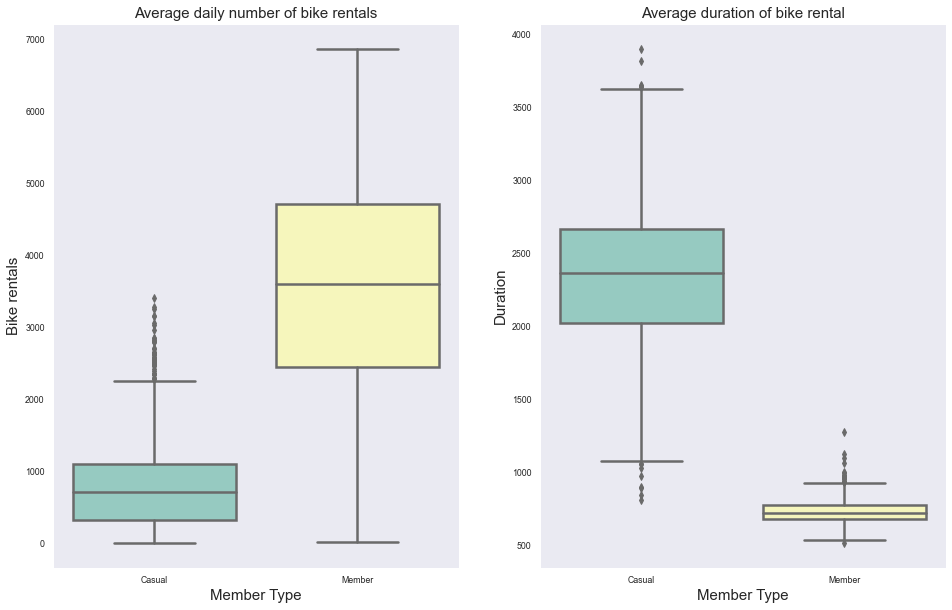

In [183]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 10))
palette = sns.color_palette("Set3", 10)

sns.boxplot(x='Member type', y='rental_id', data=df_daily_byMember, ax=ax1, palette=palette)
ax1.set_title('Average daily number of bike rentals', fontsize=15)
ax1.set_ylabel('Bike rentals',fontsize=15)
ax1.set_xlabel('Member Type',fontsize=15)

sns.boxplot(x='Member type', y='Duration', data=df_daily_byMember, ax=ax2, palette=palette)
ax2.set_title('Average duration of bike rental',fontsize=15)
ax2.set_ylabel('Duration',fontsize=15)
ax2.set_xlabel('Member Type',fontsize=15)

plt.show()

# ax.set_title("Total number of rentals",fontsize=30)
# ax.set_xlabel('Month', fontsize=30)
# ax.set_ylabel('Number of Rentals', fontsize=30)
# ax.legend().set_title('Member Type')
# plt.setp(ax.get_legend().get_texts(), fontsize='25') 
# plt.setp(ax.get_legend().get_title(), fontsize='32')

In [147]:
df_byMonth = trip.groupby(['month', 'Member type']) \
                .agg({'rental_id': 'count', 'Duration': 'mean'}) \
                .reset_index()


In [148]:
df_byMonth

,month,Member type,rental_id,Duration
0,April,Casual,60773,2874.889227
1,April,Member,204802,764.206810
2,August,Casual,71987,2511.878645
3,August,Member,275125,734.206731
4,December,Casual,21677,2155.753656
5,December,Member,187250,655.674756
6,February,Casual,14940,2406.074967
7,February,Member,134852,666.274286
8,January,Casual,12035,2085.505692
9,January,Member,121339,670.943876


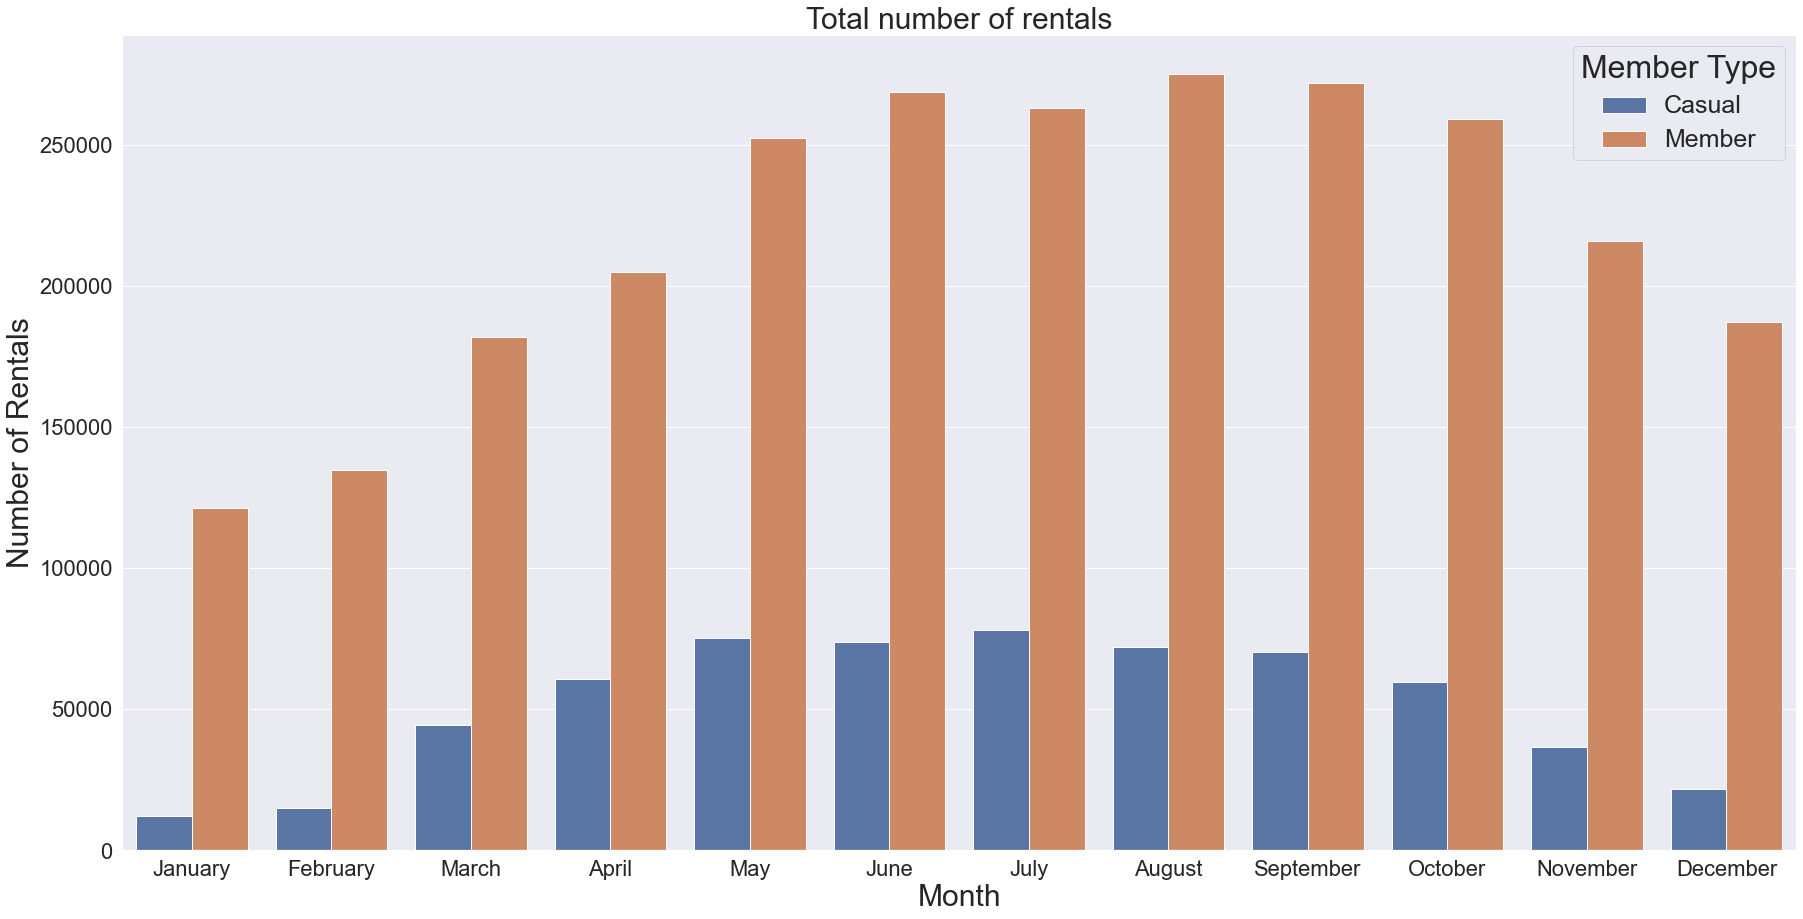

In [199]:
cats = ['January', 'February', 'March', 'April','May','June', 'July', 'August','September', 'October', 'November', 'December']
plt.figure(figsize = (30,15))
ax = sns.barplot(data= df_byMonth, x= 'month', y='rental_id', hue= 'Member type', order=cats)
ax.set_title("Total number of rentals",fontsize=30)
ax.set_xlabel('Month', fontsize=30)
ax.set_ylabel('Number of Rentals', fontsize=30)
ax.legend().set_title('Member Type')
plt.setp(ax.get_legend().get_texts(), fontsize='25') 
plt.setp(ax.get_legend().get_title(), fontsize='32')
sns.set(font_scale = 1)


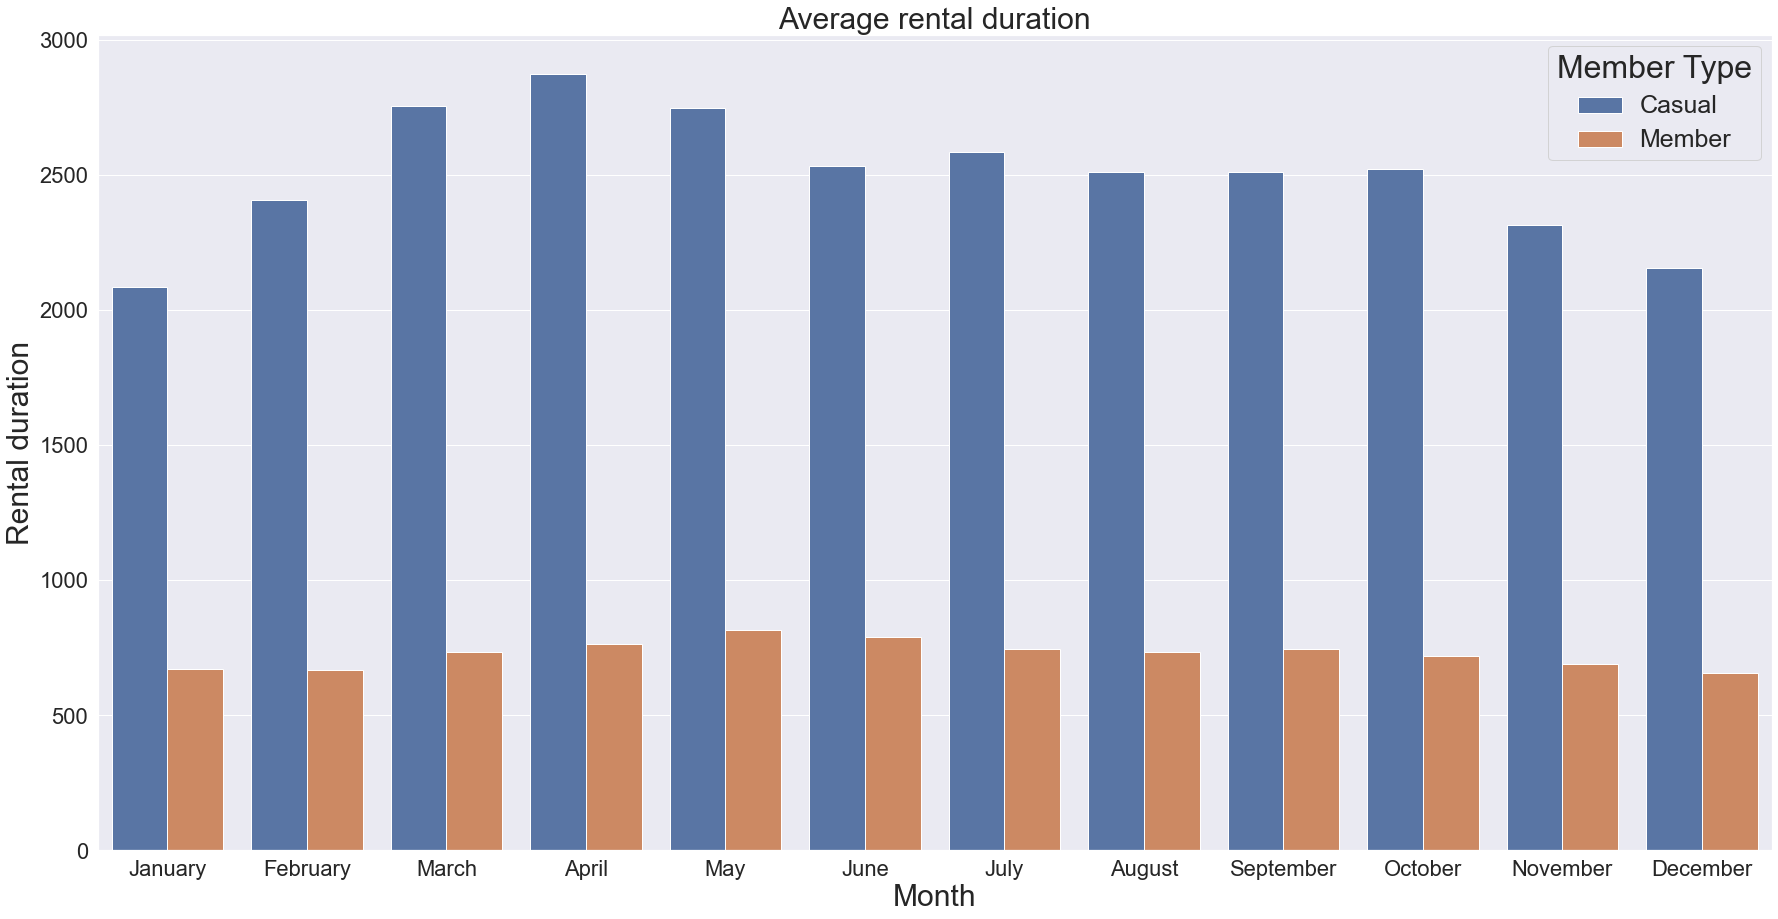

In [196]:
cats = ['January', 'February', 'March', 'April','May','June', 'July', 'August','September', 'October', 'November', 'December']
plt.figure(figsize = (30,15))
ax = sns.barplot(data= df_byMonth, x= 'month', y='Duration', hue= 'Member type', order=cats)
ax.set_title("Average rental duration",fontsize=30)
ax.set_xlabel('Month', fontsize=30)
ax.set_ylabel('Rental duration', fontsize=30)
ax.legend().set_title('Member Type')
plt.setp(ax.get_legend().get_texts(), fontsize='25') 
plt.setp(ax.get_legend().get_title(), fontsize='32')
sns.set(font_scale = 3)

In [184]:

df_byWeekday = trip.groupby(['weekday', 'Member type']) \
                .agg({'rental_id': 'count', 'Duration': 'mean'}) \
                .reset_index()
df_byWeekday

,weekday,Member type,rental_id,Duration
0,Friday,Casual,78173,2465.911184
1,Friday,Member,404149,717.898411
2,Monday,Casual,70728,2550.295088
3,Monday,Member,379580,726.635826
4,Saturday,Casual,153765,2768.442233
5,Saturday,Member,318385,778.086775
6,Sunday,Casual,140482,2758.935138
7,Sunday,Member,298313,754.155035
8,Thursday,Casual,61411,2315.016789
9,Thursday,Member,418562,725.585242


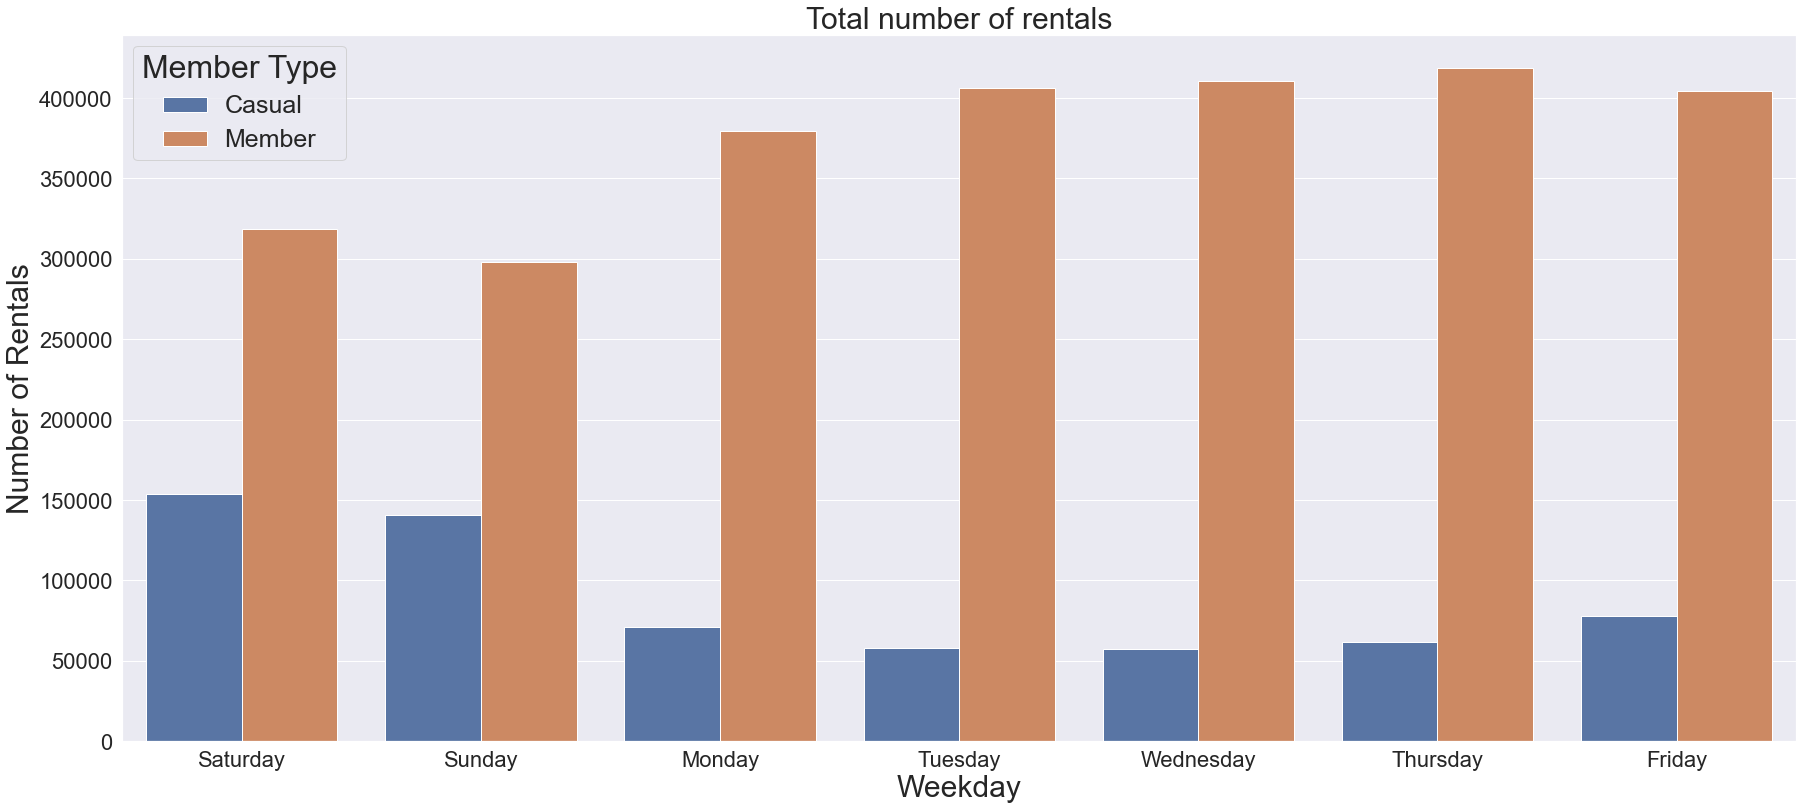

In [203]:
cats = ['Saturday', 'Sunday', 'Monday', 'Tuesday','Wednesday','Thursday', 'Friday']
plt.figure(figsize = (30,13))
ax = sns.barplot(data= df_byWeekday, x= 'weekday', y='rental_id', hue= 'Member type', order=cats)
ax.set_title("Total number of rentals",fontsize=30)
ax.set_xlabel('Weekday', fontsize=30)
ax.set_ylabel('Number of Rentals', fontsize=30)
ax.legend().set_title('Member Type')
plt.setp(ax.get_legend().get_texts(), fontsize='25') 
plt.setp(ax.get_legend().get_title(), fontsize='32')
sns.set(font_scale = 3)

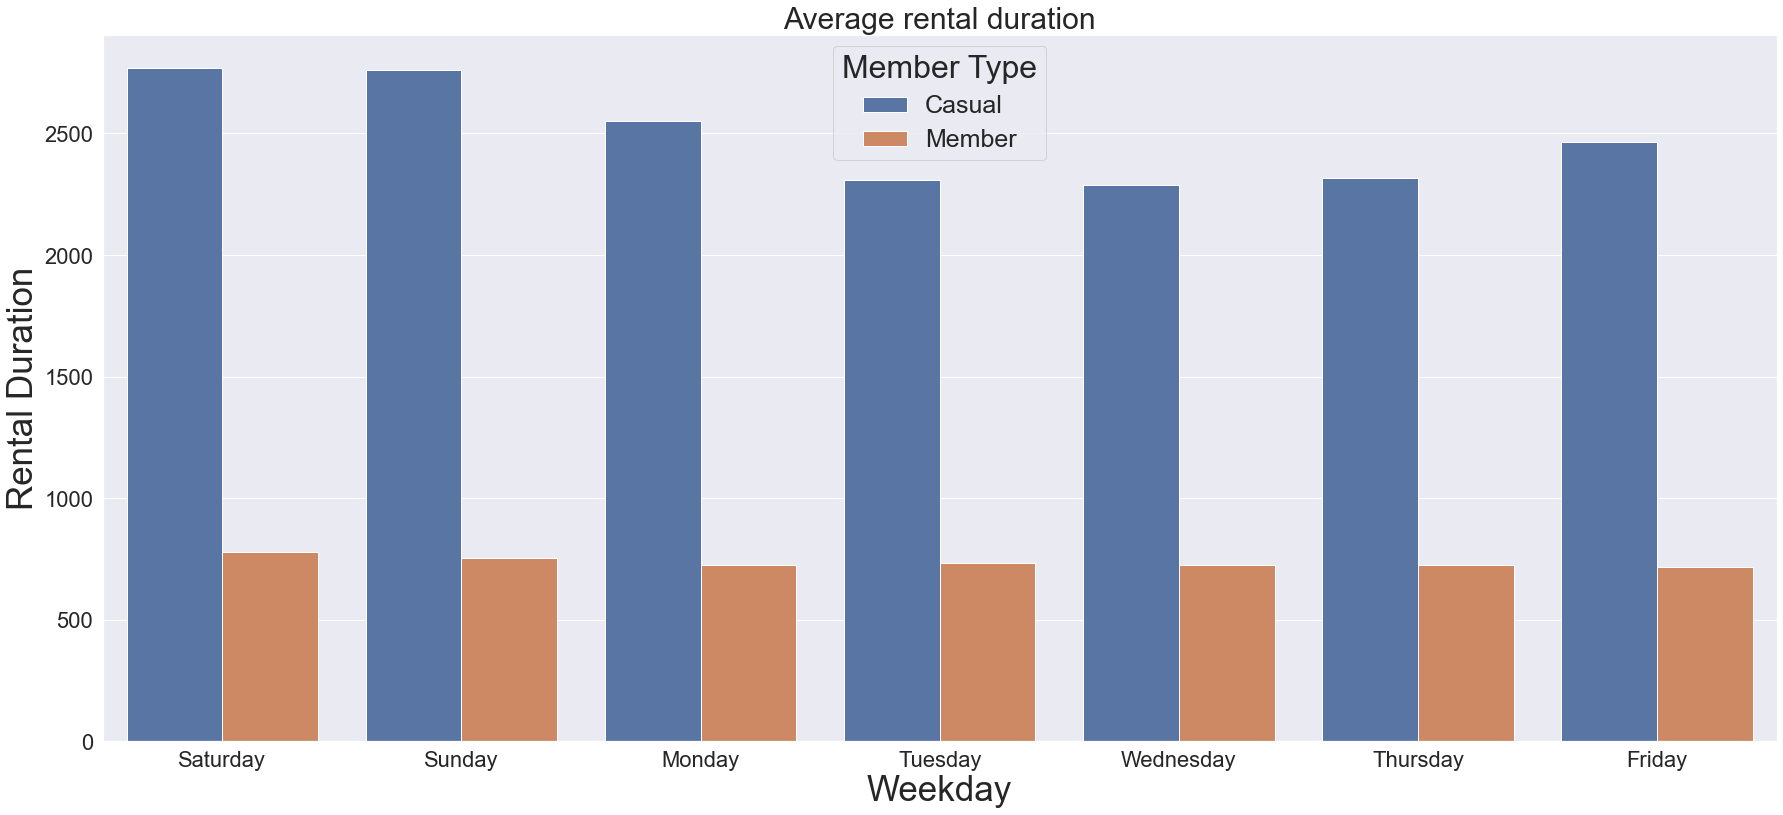

In [207]:
cats = ['Saturday', 'Sunday', 'Monday', 'Tuesday','Wednesday','Thursday', 'Friday']
plt.figure(figsize = (30,13))
ax = sns.barplot(data= df_byWeekday, x= 'weekday', y='Duration', hue= 'Member type', order=cats)
ax.set_title("Average rental duration",fontsize=30)
ax.set_xlabel('Weekday', fontsize=35)
ax.set_ylabel('Rental Duration', fontsize=35)
ax.legend().set_title('Member Type')
plt.setp(ax.get_legend().get_texts(), fontsize='25') 
plt.setp(ax.get_legend().get_title(), fontsize='32')
sns.set(font_scale = 2)

In [208]:
trip['weekday_number'] = trip['Start date'].dt.day_name()
trip

,rental_id,Start date,End date,Start station number,End station number,Bike number,Member type,Duration,month,weekday,date,time,hour,holiday,Year,weekday_number
0,0,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,31620,W00247,Member,3548,January,Saturday,2011-01-01,00:01:29,0,No,2011,Saturday
1,1,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,31101,W00675,Casual,346,January,Saturday,2011-01-01,00:02:46,0,No,2011,Saturday
2,2,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,31104,W00357,Member,562,January,Saturday,2011-01-01,00:06:13,0,No,2011,Saturday
3,3,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,31503,W00970,Member,434,January,Saturday,2011-01-01,00:09:21,0,No,2011,Saturday
4,4,2011-01-01 00:28:26,2011-01-01 00:32:19,31104,31106,W00346,Casual,233,January,Saturday,2011-01-01,00:28:26,0,No,2011,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3255673,3255673,2012-12-31 23:51:38,2013-01-01 02:15:29,31619,31619,W00704,Casual,8630,December,Monday,2012-12-31,23:51:38,23,No,2012,Monday
3255674,3255674,2012-12-31 23:56:19,2013-01-01 00:03:17,31101,31200,W00098,Member,418,December,Monday,2012-12-31,23:56:19,23,No,2012,Monday
3255675,3255675,2012-12-31 23:56:35,2013-01-01 00:03:00,31101,31200,W01398,Member,384,December,Monday,2012-12-31,23:56:35,23,No,2012,Monday
3255676,3255676,2012-12-31 23:58:20,2013-01-01 00:05:49,31613,31607,W01301,Member,448,December,Monday,2012-12-31,23:58:20,23,No,2012,Monday


In [211]:
trip.loc[trip['weekday_number'] == 'Saturday', 'weekday_number'] = 1
trip.loc[trip['weekday_number'] ==  'Sunday', 'weekday_number'] = 2
trip.loc[trip['weekday_number'] =='Monday', 'weekday_number'] = 3
trip.loc[trip['weekday_number'] == 'Tuesday', 'weekday_number'] = 4 
trip.loc[trip['weekday_number'] == 'Wednesday', 'weekday_number'] = 5 
trip.loc[trip['weekday_number'] == 'Thursday', 'weekday_number'] = 6
trip.loc[trip['weekday_number'] == 'Friday', 'weekday_number'] = 7


In [212]:
trip

,rental_id,Start date,End date,Start station number,End station number,Bike number,Member type,Duration,month,weekday,date,time,hour,holiday,Year,weekday_number
0,0,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,31620,W00247,Member,3548,January,Saturday,2011-01-01,00:01:29,0,No,2011,1
1,1,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,31101,W00675,Casual,346,January,Saturday,2011-01-01,00:02:46,0,No,2011,1
2,2,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,31104,W00357,Member,562,January,Saturday,2011-01-01,00:06:13,0,No,2011,1
3,3,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,31503,W00970,Member,434,January,Saturday,2011-01-01,00:09:21,0,No,2011,1
4,4,2011-01-01 00:28:26,2011-01-01 00:32:19,31104,31106,W00346,Casual,233,January,Saturday,2011-01-01,00:28:26,0,No,2011,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3255673,3255673,2012-12-31 23:51:38,2013-01-01 02:15:29,31619,31619,W00704,Casual,8630,December,Monday,2012-12-31,23:51:38,23,No,2012,3
3255674,3255674,2012-12-31 23:56:19,2013-01-01 00:03:17,31101,31200,W00098,Member,418,December,Monday,2012-12-31,23:56:19,23,No,2012,3
3255675,3255675,2012-12-31 23:56:35,2013-01-01 00:03:00,31101,31200,W01398,Member,384,December,Monday,2012-12-31,23:56:35,23,No,2012,3
3255676,3255676,2012-12-31 23:58:20,2013-01-01 00:05:49,31613,31607,W01301,Member,448,December,Monday,2012-12-31,23:58:20,23,No,2012,3


In [214]:
df_daily_byMember['date'] = pd.to_datetime(df_daily_byMember['date'])

In [215]:
df_daily_byMember['weekday'] = df_daily_byMember['date'].dt.weekday
df_daily_byMember['part_of_week'] = df_daily_byMember['weekday'].apply(lambda x: 'weekday' if x < 5 else 'weekend')

In [216]:
df_daily_byMember

,date,Member type,rental_id,Duration,weekday,part_of_week
0,2011-01-01,Casual,330,3091.124242,5,weekend
1,2011-01-01,Member,629,686.240064,5,weekend
2,2011-01-02,Casual,130,2137.661538,6,weekend
3,2011-01-02,Member,651,609.674347,6,weekend
4,2011-01-03,Casual,120,3362.450000,0,weekday
...,...,...,...,...,...,...
1457,2012-12-29,Member,1170,584.029915,5,weekend
1458,2012-12-30,Casual,364,2136.315934,6,weekend
1459,2012-12-30,Member,1416,593.750000,6,weekend
1460,2012-12-31,Casual,439,2301.829157,0,weekday


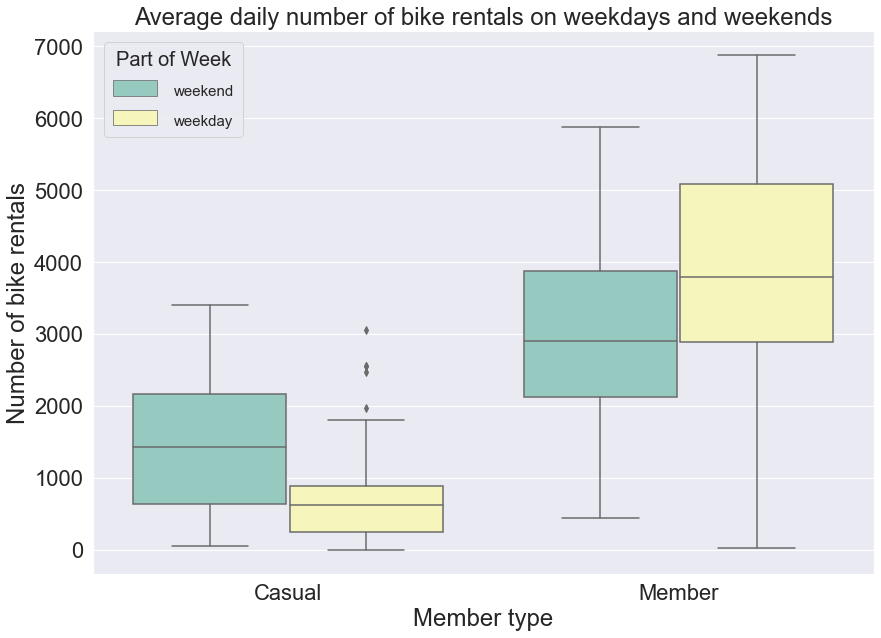

In [234]:
fig, ax = plt.subplots(figsize=(14, 10))
palette = sns.color_palette("Set3", 10)
sns.boxplot(x='Member type', y='rental_id', hue='part_of_week', data=df_daily_byMember, palette=palette)
ax.set_title('Average daily number of bike rentals on weekdays and weekends')
ax.set_ylabel('Number of bike rentals')
ax.legend().set_title('Part of Week')
plt.setp(ax.get_legend().get_texts(), fontsize='15') 
plt.setp(ax.get_legend().get_title(), fontsize='20')
plt.show()

sns.set(font_scale = 1)

In [235]:
df_byHour = trip.groupby(['hour', 'Member type']) \
                .agg({'rental_id': 'count', 'Duration': 'mean'}) \
                .reset_index()
df_byHour

,hour,Member type,rental_id,Duration
0,0,Casual,7370,1895.647897
1,0,Member,31248,724.361815
2,1,Casual,4710,1890.049469
3,1,Member,19131,695.537661
4,2,Casual,3405,2063.528634
5,2,Member,12709,755.238256
6,3,Casual,1887,2377.232644
7,3,Member,6158,776.334687
8,4,Casual,873,2192.357388
9,4,Member,3458,738.094563


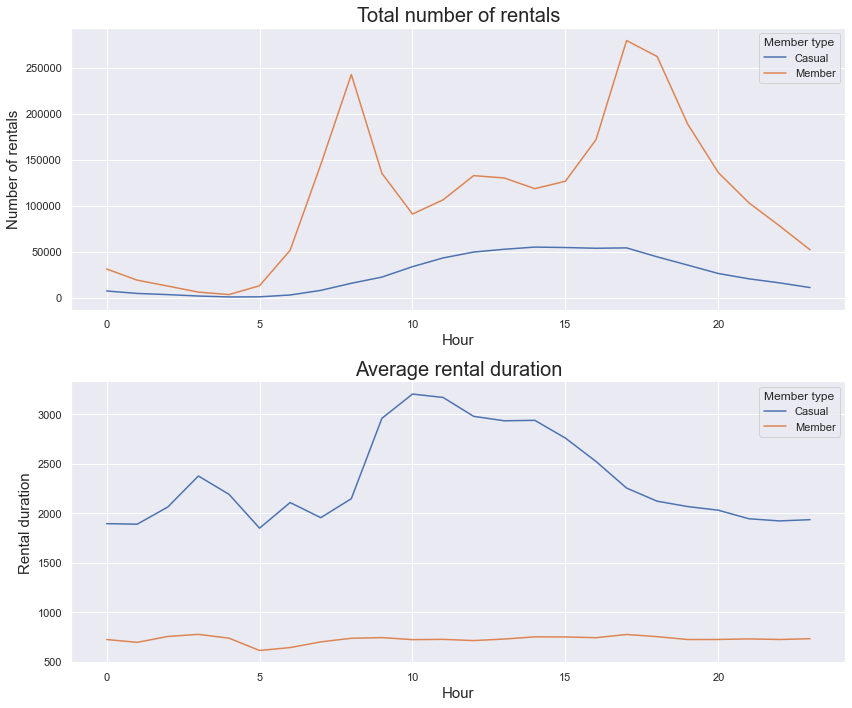

In [242]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
palette = sns.husl_palette(10, h=.5)

sns.lineplot(x='hour', y='rental_id', hue='Member type', data=df_byHour, ax=ax1, ci=None)
ax1.set_title('Total number of rentals',fontsize=20)
ax1.set_ylabel('Number of rentals',fontsize=15)
ax1.set_xlabel('Hour', fontsize=15)
sns.lineplot(x='hour', y='Duration', hue='Member type', data=df_byHour, ax=ax2, ci=None)
ax2.set_title('Average rental duration',fontsize=20)
ax2.set_ylabel('Rental duration',fontsize=15)
ax2.set_xlabel('Hour', fontsize=15)

plt.tight_layout()
plt.show()